In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv("/Users/duminduudara/Documents/Study/DS_ML/Machine Learning/data/cardio.csv")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

In [5]:
# Check mising values 
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
data.duplicated().sum()

0

<Axes: >

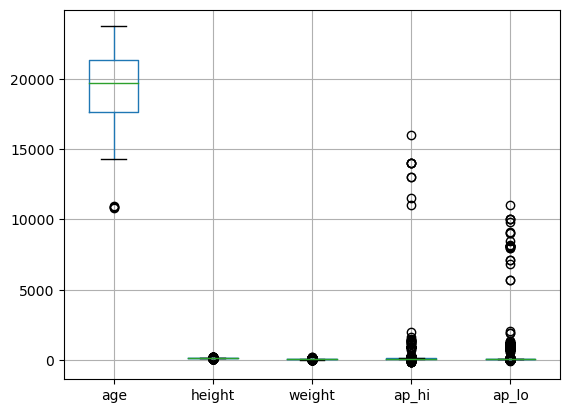

In [7]:
data[["age","height","weight","ap_hi","ap_lo"]].boxplot()

In [8]:
data["age"] = (data["age"]/365).values.astype(int)

In [9]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data["bmi"] = data["weight"]/((data["height"]/100)**2)

In [11]:
data.drop(["height","weight"],axis=1,inplace=True)

In [12]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


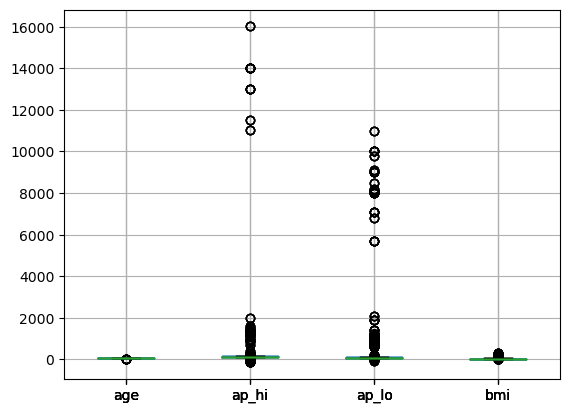

In [17]:
data[["age","ap_hi","ap_lo","bmi"]].dropna().boxplot()
plt.show()

In [18]:
data_num = data[["age","ap_hi","ap_lo","bmi"]]

In [19]:
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)

IQR = Q3 - Q1

In [20]:
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
bmi       6.347107
dtype: float64

In [21]:
out_rows = ((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis=1)

In [23]:
data = data[~out_rows]

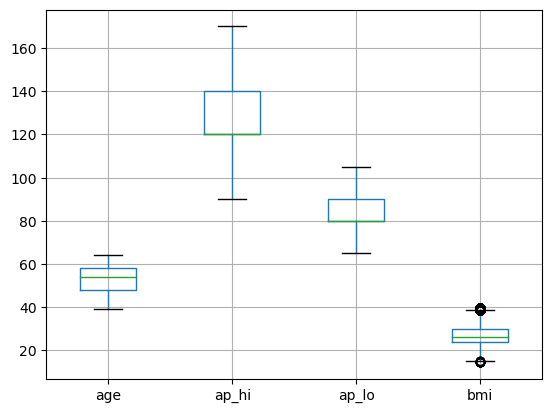

In [24]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()
plt.show()

In [25]:
data[["age","ap_hi","ap_lo","bmi"]].describe()

,age,ap_hi,ap_lo,bmi
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


In [26]:
data["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

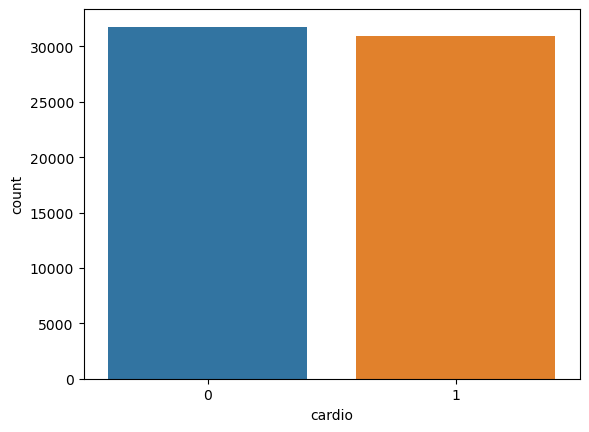

In [31]:
sns.countplot(x="cardio", data=data)
plt.show()

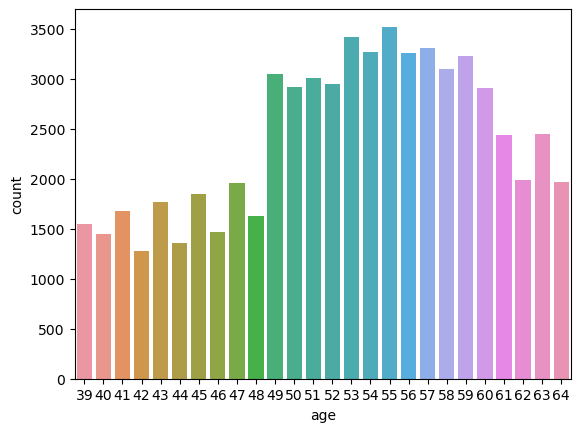

In [32]:
sns.countplot(data=data,x="age")
plt.show()

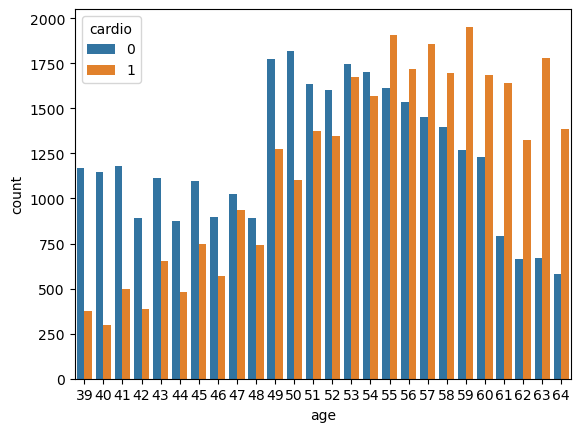

In [33]:
sns.countplot(data=data,x="age",hue="cardio")
plt.show()

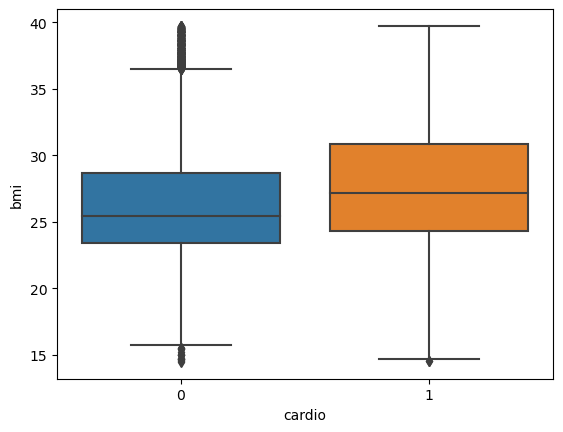

In [36]:
sns.boxplot(x="cardio",y="bmi",data=data)
plt.show()

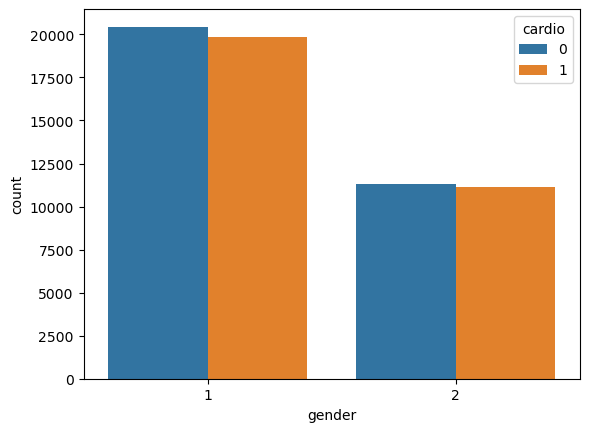

In [37]:
sns.countplot(data=data,x="gender",hue="cardio")
plt.show()

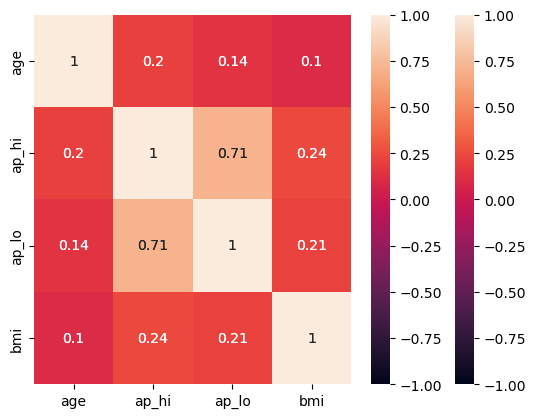

In [40]:
sns.heatmap(data[["age","ap_hi","ap_lo","bmi"]].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

/Users/duminduudara/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


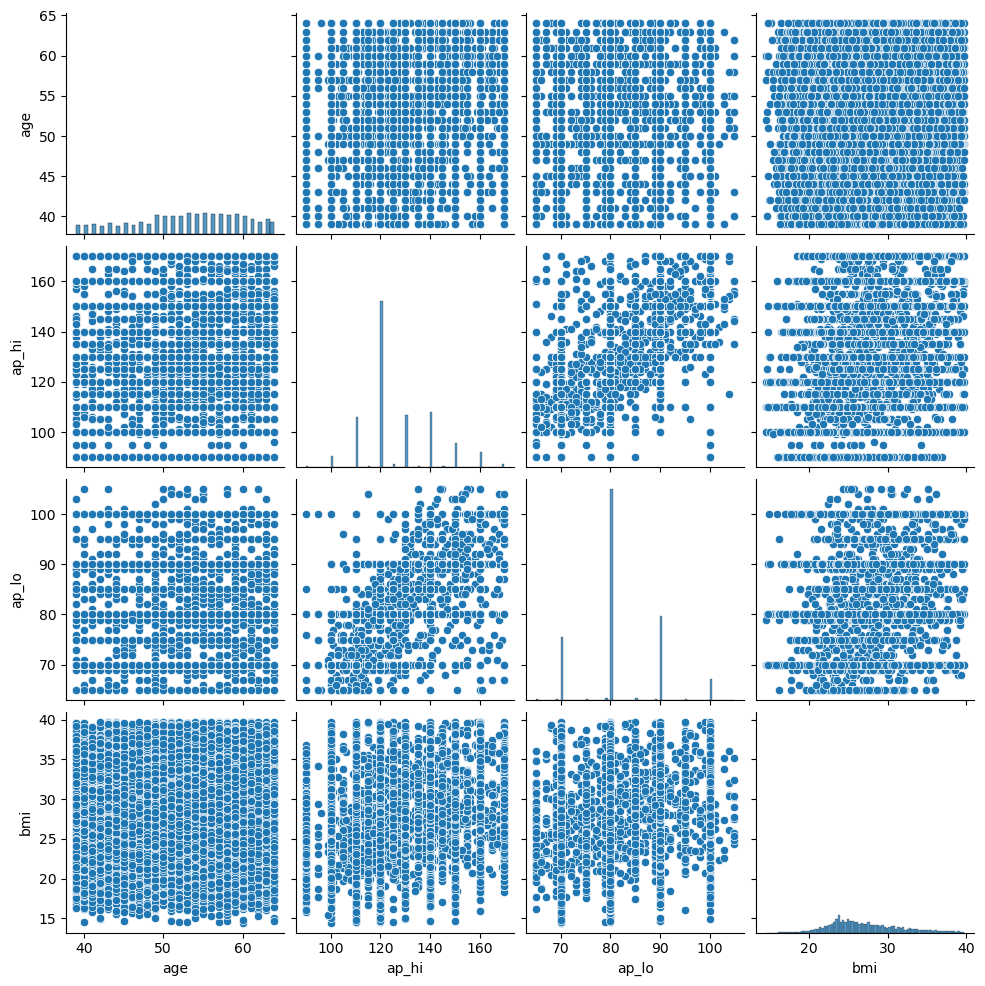

In [41]:
sns.pairplot(data[["age","ap_hi","ap_lo","bmi"]])
plt.show()

In [42]:
df = data[["age","ap_hi","ap_lo","bmi"]]
df["cardio"] = ["Yes" if m==1 else "No" for m in data["cardio"]]
df.head()

/var/folders/7l/0c03_8c5429858btd52kjh640000gn/T/ipykernel_4522/4143152995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"] = ["Yes" if m==1 else "No" for m in data["cardio"]]


,age,ap_hi,ap_lo,bmi,cardio
0,50,110,80,21.967120,No
1,55,140,90,34.927679,Yes
2,51,130,70,23.507805,Yes
3,48,150,100,28.710479,Yes
5,60,120,80,29.384676,No


/Users/duminduudara/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


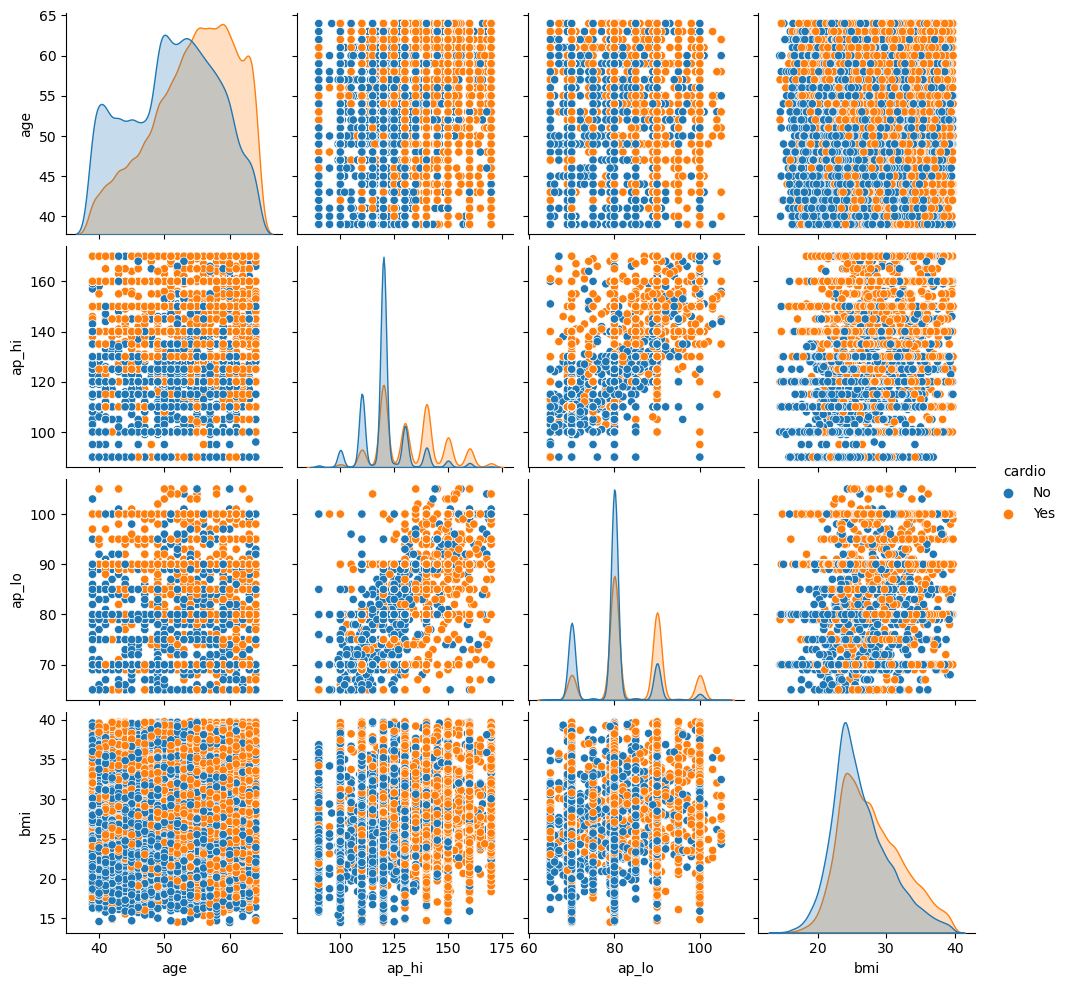

In [45]:
sns.pairplot(df,hue="cardio")
plt.show()

In [46]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [47]:
data.drop("id",axis=1,inplace=True)

In [48]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676


In [49]:
data = data.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])

In [50]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [51]:
# check how many catogories 
data["gender"].value_counts()

gender
1    40289
2    22456
Name: count, dtype: int64

In [52]:
data["cholesterol"].value_counts()

cholesterol
1    47420
2     8257
3     7068
Name: count, dtype: int64

In [53]:
data["gluc"].value_counts()

gluc
1    53596
3     4714
2     4435
Name: count, dtype: int64

In [54]:
data["smoke"].value_counts()

smoke
0    57184
1     5561
Name: count, dtype: int64

In [55]:
data["alco"].value_counts()

alco
0    59413
1     3332
Name: count, dtype: int64

In [57]:
data["active"].value_counts()

active
1    50465
0    12280
Name: count, dtype: int64

In [58]:
data["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

In [60]:
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])

In [61]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [63]:
ohe = OneHotEncoder()

In [73]:
ohot_encode1 = ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"].values),1)).toarray()
ohot_encode1 = ohot_encode1[:,1:].astype(int)
df_ohot1 = pd.DataFrame(ohot_encode1,columns=["Above Nor Chol","Well Above Nor Chol"])
df_ohot1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [74]:
ohot_encode2 = ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encode2 = ohot_encode2[:,1:].astype(int)
df_ohot2 = pd.DataFrame(ohot_encode1,columns=["Above Nor gluc","Well Above Nor gluc"])
df_ohot2

,Above Nor gluc,Well Above Nor gluc
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [75]:
# Combine these data frame 
data

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,53,130,90,23.661439,0,1,1,0,0,1,1
69994,57,150,80,29.384757,0,1,1,0,0,1,1
69995,52,120,80,26.927438,1,1,1,1,0,1,0
69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [76]:
data.reset_index(inplace=True)
data

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [77]:
data.drop("index",axis=1,inplace=True)
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [79]:
x = pd.concat([data.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
x.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,1
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [80]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)

In [81]:
x.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor gluc
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,1
2,51,130,70,23.507805,0,0,0,0,0,1,0,1
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [83]:
# independent dependent 
x = x.values
y = data.iloc[:,10].values

In [84]:
x

array([[ 50., 110.,  80., ...,   0.,   0.,   0.],
       [ 55., 140.,  90., ...,   1.,   0.,   1.],
       [ 51., 130.,  70., ...,   1.,   0.,   1.],
       ...,
       [ 52., 120.,  80., ...,   0.,   0.,   0.],
       [ 61., 135.,  80., ...,   0.,   0.,   0.],
       [ 56., 120.,  80., ...,   0.,   1.,   0.]])

In [85]:
x[:,:5]

array([[ 50.        , 110.        ,  80.        ,  21.96712018,
          1.        ],
       [ 55.        , 140.        ,  90.        ,  34.92767916,
          0.        ],
       [ 51.        , 130.        ,  70.        ,  23.50780533,
          0.        ],
       ...,
       [ 52.        , 120.        ,  80.        ,  26.92743764,
          1.        ],
       [ 61.        , 135.        ,  80.        ,  27.09925101,
          0.        ],
       [ 56.        , 120.        ,  80.        ,  24.91349481,
          0.        ]])

In [89]:
sc = StandardScaler()

In [90]:
x[:,:5] = sc.fit_transform(x[:,:5])

In [91]:
x[:,:5]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289,  1.33945166],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238, -0.74657416],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937, -0.74657416],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046,  1.33945166],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426, -0.74657416],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443, -0.74657416]])

In [86]:
y

array([0, 1, 1, ..., 0, 1, 0])

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
model1 = KNeighborsClassifier(n_neighbors=50)
model2 = LogisticRegression()
model3 = SVC(kernel="rbf",C=1)
model4 = RandomForestClassifier(n_estimators=500)

T1=('KNNC',model1)
T2=('LR',model2)
T3=('SVM',model3) 
T4=('RFC',model4) 

model = VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [102]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('KNNC', KNeighborsClassifier(n_neighbors=50)),
                             ('LR', LogisticRegression()), ('SVM', SVC(C=1)),
                             ('RFC', RandomForestClassifier(n_estimators=500))])

In [103]:
y_pred = model.predict(x_test)

In [104]:
confusion_matrix(y_test,y_pred)

array([[5164, 1251],
       [2200, 3934]])

In [106]:
accuracy_score(y_test,y_pred)

0.7249980078093872

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6415
           1       0.76      0.64      0.70      6134

    accuracy                           0.72     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.72      0.72     12549

